In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat May 29 06:48:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
DIR = "/content/drive/MyDrive/HACKATHON"

In [8]:
os.chdir(DIR)

# Importing the Relevant Libraries

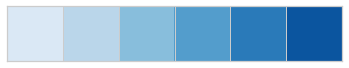

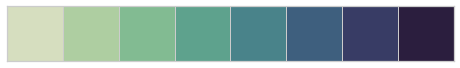

In [9]:
from palettable.colorbrewer.diverging import *
import seaborn  as sns
sns.set(style='whitegrid', palette="Spectral_r")
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
cpal = sns.color_palette("Blues")
sns.palplot(cpal)
sns.palplot(cb_pal)

In [10]:
pip install catboost

     |████████████████████████████████| 67.3MB 77kB/s 


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data Inspection

In [13]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [14]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [15]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [16]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [17]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


# Data Cleaning

In [18]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [19]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [20]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [21]:
train['Credit_Product']= train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']= test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [22]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

# Exploratory Data Analysis

In [23]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [24]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [25]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [26]:
#Displays Categorical and Numerical Features from dataframe
def cat_numeric_details(df):
    print('Total Numerical Coulmns : ', len(list(df.select_dtypes(exclude=['object']).columns)), "\n")
    print('Numerical Coulmns : ', list(df.select_dtypes(exclude=['object']).columns), "\n")
    print('Total Categorical Coulmns : ', len((df.select_dtypes(include=['object']).columns)),"\n")
    print('Categorical Coulmns : ', list(df.select_dtypes(include=['object']).columns))
    
cat_numeric_details(train)

Total Numerical Coulmns :  4 

Numerical Coulmns :  ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'] 

Total Categorical Coulmns :  7 

Categorical Coulmns :  ['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']


Age Distribution

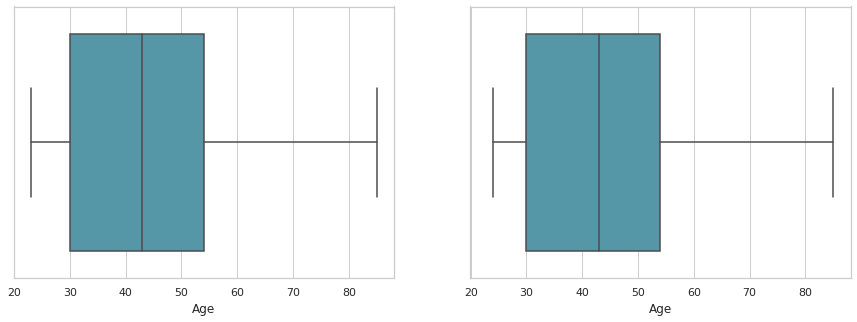

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(x = train["Age"], ax = axes[0])
sns.boxplot(x = test["Age"], ax = axes[1])

Vintage Distribution

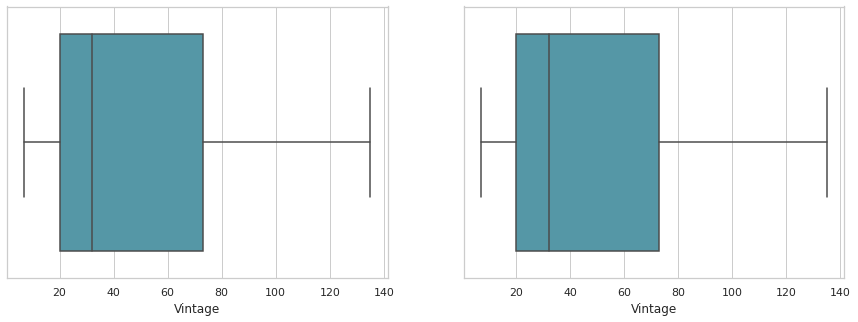

In [28]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(x = train["Vintage"], ax = axes[0])
sns.boxplot(x = test["Vintage"], ax = axes[1])

Avg_Account_Balance distribution

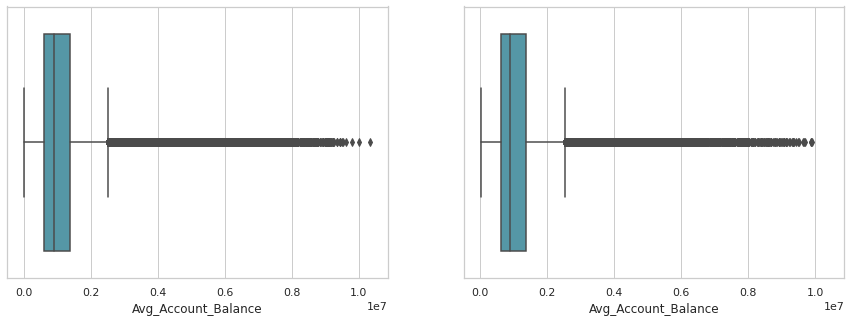

In [29]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(x = train["Avg_Account_Balance"], ax = axes[0])
sns.boxplot(x = test["Avg_Account_Balance"], ax = axes[1])

 ### Categorical Variables

In [30]:
cat_values = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [31]:
#print([for i in cat_values : train[i].value_counts()])

for i in cat_values: 
  print("Columns  : ",  i , "\n Values : ", train[i].value_counts(), "\n")

Columns  :  Gender 
 Values :  Male      134197
Female    111528
Name: Gender, dtype: int64 

Columns  :  Region_Code 
 Values :  RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64 

Columns  :  Occupation 
 Values :  Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64 

Columns  :  Channel_Code 
 Values :  X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64 

Columns  :  Credit_Prod

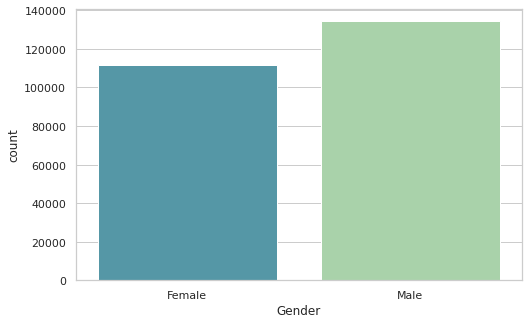

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Gender', data=train)

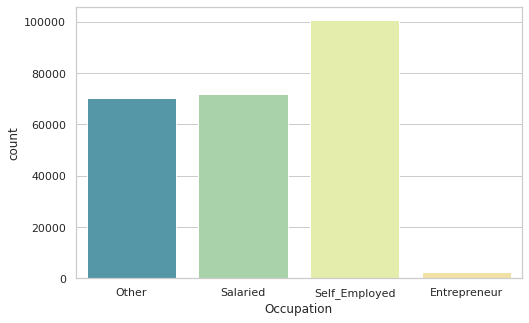

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation', data=train)

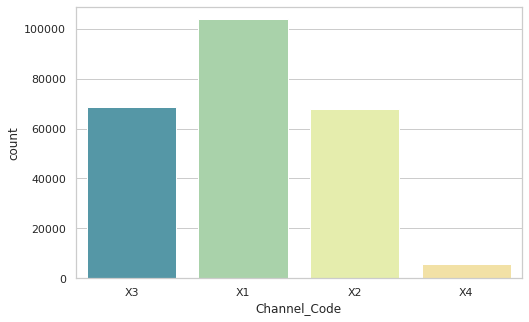

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Channel_Code', data=train)

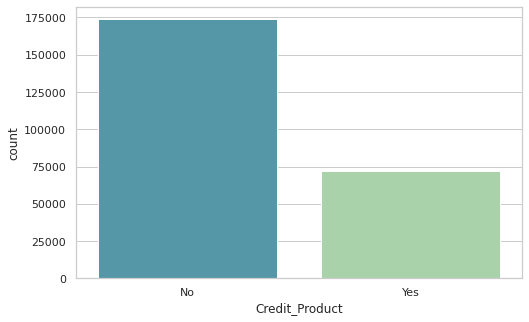

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Credit_Product', data=train)

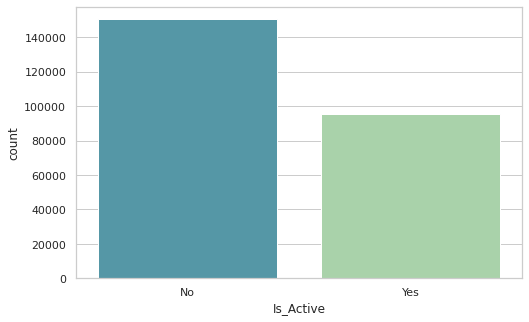

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active', data=train)

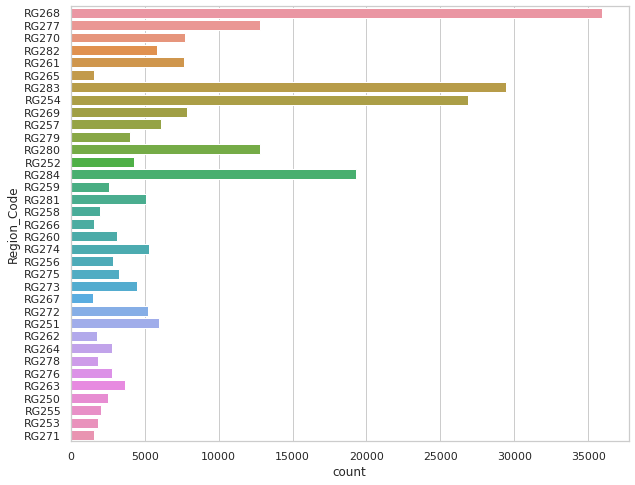

In [37]:
plt.figure(figsize=(10,8))
#sns.countplot(y='Region_Code', data=train, order=train['Region_Code'].value_counts().index)
sns.countplot(y='Region_Code', data=train)

In [38]:
train.sort_values('Region_Code')['Region_Code'].reset_index()

,index,Region_Code
0,228920,RG250
1,83398,RG250
2,127604,RG250
3,210461,RG250
4,210458,RG250
...,...,...
245720,29802,RG284
245721,232655,RG284
245722,97109,RG284
245723,126138,RG284


In [39]:
def covert_region_code_range(row):
  row_val = row.Region_Code
  code = int(row_val.split("G")[1])
  if code < 261:
    return "250-260"
  elif code < 271:
    return "261-270"
  else:
    return "271-284"

In [40]:
train['Region_Code_Range'] = train.apply(covert_region_code_range, axis=1)
test['Region_Code_Range'] = test.apply(covert_region_code_range, axis=1)

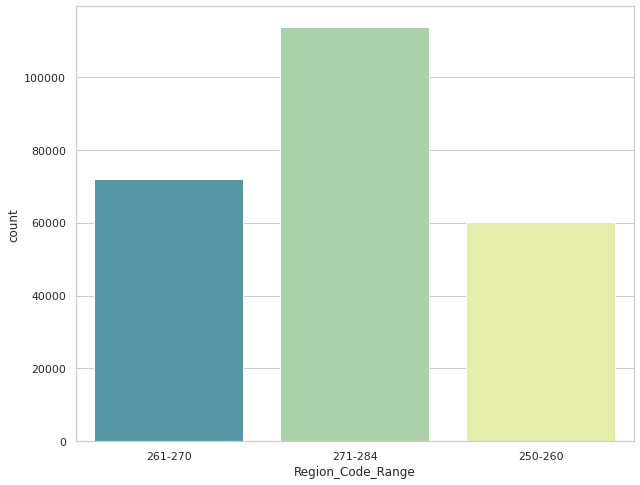

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='Region_Code_Range', data=train)

# Feature Engineering

## Chi-Square

In [42]:
import scipy.stats as stats
from scipy.stats import chi2


def chi_square(dataset, col1, col2):
  print("Relationship Between ", col1, "  ", col2)
  dataset_table = pd.crosstab(dataset[col1], dataset[col2])
  #print(dataset_table)
  
  Observed_Values = dataset_table.values 
  #print("Observed Values :-\n",Observed_Values)
  
  val = stats.chi2_contingency(dataset_table)
  #print(val)
  
  Expected_Values=val[3]
  
  no_of_rows=len(dataset_table.iloc[0:2,0])
  no_of_columns=len(dataset_table.iloc[0,0:2])
  ddof=(no_of_rows-1)*(no_of_columns-1)
  #print("Degree of Freedom:",ddof)
  alpha = 0.05
  
  chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
  chi_square_statistic = chi_square[0]+chi_square[1]
  
  print("chi-square statistic:-",chi_square_statistic)

  critical_value=chi2.ppf(q=1-alpha,df=ddof)
  print('critical_value:',critical_value)

  #p-value
  p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
  print('p-value:',p_value)
  print('Significance level: ',alpha)
  print('Degree of Freedom: ',ddof)
  

  if chi_square_statistic>=critical_value:
      print("Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("Retain H0,There is no relationship between 2 categorical variables")
      
  if p_value<=alpha:
      print("Reject H0,There is a relationship between 2 categorical variables")
  else:
      print("Retain H0,There is no relationship between 2 categorical variables")

  print("\n")

In [43]:
train["Is_Lead_test"] = train["Is_Lead"].map({
    0:'Yes',
    1:'No'
})

In [44]:
Cat_Columns = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Region_Code_Range']

for col in Cat_Columns:
  chi_square(train, "Is_Lead_test", col)

Relationship Between  Is_Lead_test    Gender
chi-square statistic:- 1276.2431775486666
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Relationship Between  Is_Lead_test    Region_Code
chi-square statistic:- 88.60619613669006
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Relationship Between  Is_Lead_test    Occupation
chi-square statistic:- 2666.3344213360683
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Relationship Between  Is_Lead_test    Channe

In [45]:
train.drop(columns="Is_Lead_test", inplace=True)

# Train and Test assigned to new df for feature engineering

In [46]:
df_train = train.copy()
df_test = test.copy()

## Encoding

Columns  :  Gender 
 Values :  Male      134197
Female    111528
Name: Gender, dtype: int64 

Columns  :  Region_Code 
 Values :  RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64 

Columns  :  Occupation 
 Values :  Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64 

Columns  :  Channel_Code 
 Values :  X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64 

Columns  :  Credit_Product 
 Values :  No     173682
Yes     72043
Name: Credit_Product, dtype: int64 

Columns  :  Is_Active 
 Values :  No     150290
Yes     95435
Name: Is_Active, dtype: int64 

In [47]:
def freq_encoding(df):
    frequency = df.groupby('Region_Code').size()/len(df)
    df.loc[:,'Region_Code_fcode'] = df['Region_Code'].map(frequency)
    df.drop(columns='Region_Code',axis=1,inplace=True)
    return df

Train

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
freq_encoding(df_train)
df_train = pd.get_dummies(df_train, columns=['Gender', 'Occupation', 'Credit_Product', 'Is_Active', 'Region_Code_Range'])
df_train['Channel_Code'] = le.fit_transform(df_train['Channel_Code'])

Test

In [50]:
freq_encoding(df_test)
df_test = pd.get_dummies(df_test, columns=['Gender', 'Occupation', 'Credit_Product', 'Is_Active', 'Region_Code_Range'])
df_test['Channel_Code'] = le.fit_transform(df_test['Channel_Code'])

# Model Building

In [51]:
df_train.columns

Index(['ID', 'Age', 'Channel_Code', 'Vintage', 'Avg_Account_Balance',
       'Is_Lead', 'Region_Code_fcode', 'Gender_Female', 'Gender_Male',
       'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Credit_Product_No', 'Credit_Product_Yes',
       'Is_Active_No', 'Is_Active_Yes', 'Region_Code_Range_250-260',
       'Region_Code_Range_261-270', 'Region_Code_Range_271-284'],
      dtype='object')

In [52]:
df_train.shape

(245725, 20)

In [53]:
df_train.head()

,ID,Age,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_fcode,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Region_Code_Range_250-260,Region_Code_Range_261-270,Region_Code_Range_271-284
0,NNVBBKZB,73,2,43,1045696,0,0.146237,1,0,0,1,0,0,1,0,1,0,0,1,0
1,IDD62UNG,30,0,32,581988,0,0.052197,1,0,0,0,1,0,1,0,1,0,0,0,1
2,HD3DSEMC,56,2,26,1484315,0,0.146237,1,0,0,0,0,1,1,0,0,1,0,1,0
3,BF3NC7KV,34,0,19,470454,0,0.031417,0,1,0,0,1,0,1,0,1,0,0,1,0
4,TEASRWXV,30,0,33,886787,0,0.023722,1,0,0,0,1,0,1,0,1,0,0,0,1


In [54]:
df_train = df_train.select_dtypes(exclude='object')
df_test = df_test.select_dtypes(exclude='object')

In [55]:
df_train.head()

,Age,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_fcode,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Region_Code_Range_250-260,Region_Code_Range_261-270,Region_Code_Range_271-284
0,73,2,43,1045696,0,0.146237,1,0,0,1,0,0,1,0,1,0,0,1,0
1,30,0,32,581988,0,0.052197,1,0,0,0,1,0,1,0,1,0,0,0,1
2,56,2,26,1484315,0,0.146237,1,0,0,0,0,1,1,0,0,1,0,1,0
3,34,0,19,470454,0,0.031417,0,1,0,0,1,0,1,0,1,0,0,1,0
4,30,0,33,886787,0,0.023722,1,0,0,0,1,0,1,0,1,0,0,0,1


In [56]:
# Seperate Features and Target
X= df_train.drop(columns = ['Is_Lead'], axis=1)
y= df_train['Is_Lead']

In [57]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1  = scaler.transform(X_valid)

scaler = StandardScaler()
X_val_1 = scaler.fit_transform(df_test)

In [59]:
print(X_train_1.shape)
print(X_val_1.shape)

(196580, 18)
(105312, 18)


In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.metrics import f1_score


def roc_auc_curve (y_test, pred_prob, model_name):
  auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
  # roc curve for models
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  plt.plot(fpr1, tpr1, linestyle='--', color='orange', label = model_name)
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

In [64]:
import csv

def save_result(test, model_name, pred_prob_val):
  count = 0 
  id_test = df_test['ID']
  filename = model_name +".csv"
  with open(filename, 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(['ID', 'Is_Lead'])
      for ids in id_test:
        writer.writerow([id_test[count], pred_prob_val[count]])
        count = count+1 

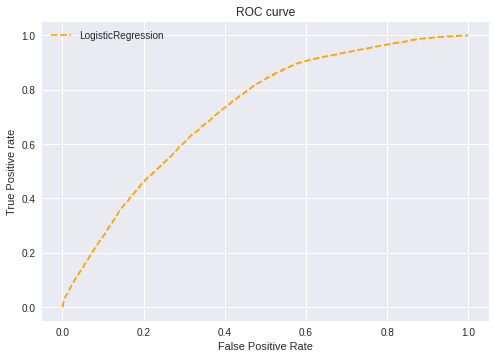

0.6791525849860683


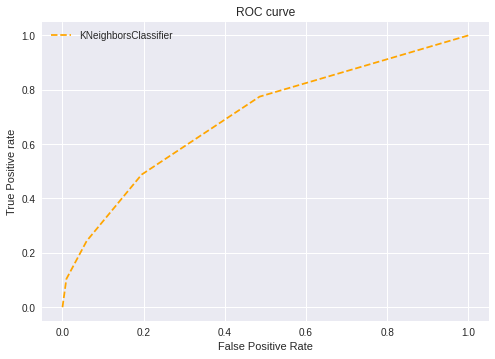

0.7394561989254943


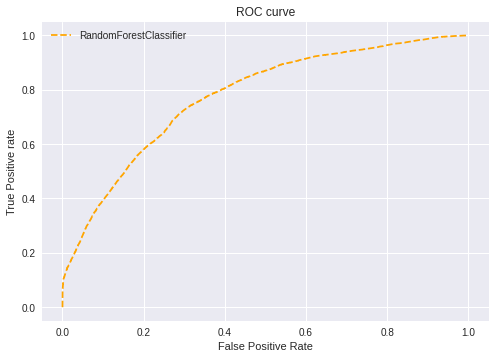

0.7138901887904012


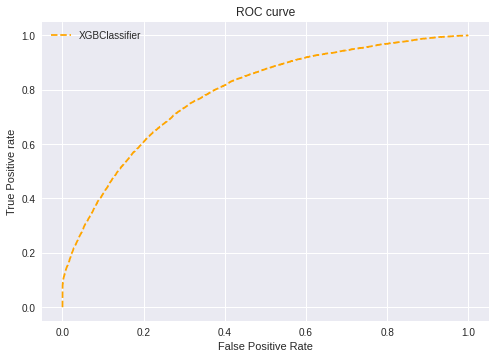

0.7599368640307311


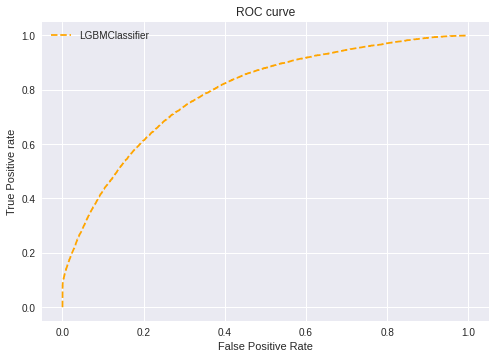

0.7580058504495232


In [66]:
def run_model(X_train, y_train, X_test_1, y_test, X_val_1, df_test):
  models = {
      "LogisticRegression" : LogisticRegression(class_weight="balanced"),
      "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
      "RandomForestClassifier" : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False),
      "XGBClassifier" : XGBClassifier(max_depth=9, min_child_weight=5,  n_estimators=220),
      "LGBMClassifier" : LGBMClassifier()
  }

  for model_name, ml_model in models.items():
    ml_model.fit(X_train_1, y_train)
    pred_prob = ml_model.predict_proba(X_test_1)
    roc_auc_curve (y_test, pred_prob, model_name)
    pred_prob_val = ml_model.predict(X_val_1)
    pred = ml_model.predict(X_test_1)
    print(f1_score(y_test, pred, average='weighted'))
    save_result(test, model_name, pred_prob_val)

run_model(X_train, y_train, X_test_1, y_valid, X_val_1, test)